# Unsupervised Learning: Clustering
## studying the impact of dimentionality reduction

Importing basic libraries

In [1]:
import pandas as pd

In [2]:
class_df = pd.read_csv('../../Datasets/Case_Study_01/car.data')
class_df.columns =   ['buying', 'maint', 'doors','persons','lug_boot','safety','target']
class_df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
from sklearn import preprocessing

features = class_df.drop(['target'],axis=1)

le = preprocessing.LabelEncoder()
conv_features = features.apply(le.fit_transform)
conv_features

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [4]:
features

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(conv_features)
label = kmeans.labels_
print(set(label))
df = pd.DataFrame(label, columns=['Clusters'])
conc = pd.concat((conv_features, df),axis=1)
conc.head()

{0, 1, 2, 3}


,buying,maint,doors,persons,lug_boot,safety,Clusters
0,3,3,0,0,2,2,1
1,3,3,0,0,2,0,1
2,3,3,0,0,1,1,1
3,3,3,0,0,1,2,1
4,3,3,0,0,1,0,1


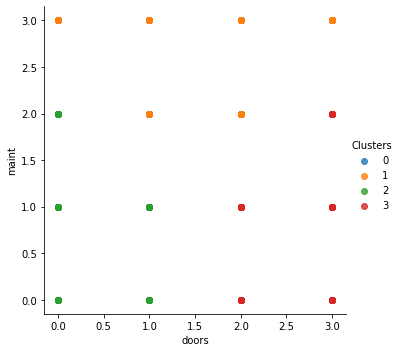

In [6]:
import seaborn as sns

sns.lmplot(x='doors',y='maint',data=conc,hue='Clusters',fit_reg=False)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(2)
df = pca.fit_transform(conv_features)
PCA_df = pd.DataFrame(df, columns=['PC1','PC2'])
PCA_df.head()

,PC1,PC2
0,-2.145344e-14,2.768721e-13
1,-1.846686e-14,2.675321e-13
2,-1.623680e-14,2.732041e-13
3,-1.539316e-14,2.717682e-13
4,-1.797402e-14,2.720946e-13


In [8]:
kmeansPCA = KMeans(n_clusters= 4)
results = kmeansPCA.fit(PCA_df)
PCA_df['clusters'] = results.labels_
PCA_df.head()

,PC1,PC2,clusters
0,-2.145344e-14,2.768721e-13,0
1,-1.846686e-14,2.675321e-13,0
2,-1.623680e-14,2.732041e-13,0
3,-1.539316e-14,2.717682e-13,0
4,-1.797402e-14,2.720946e-13,0


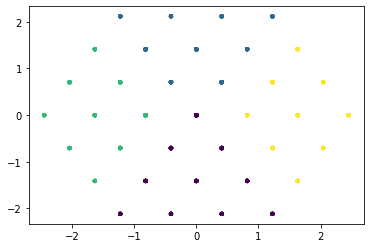

In [9]:
from matplotlib import pyplot as plt
plt.scatter(PCA_df.PC1, PCA_df.PC2, c=PCA_df.clusters, alpha = 0.6, s=10, cmap='viridis')